<a href="https://colab.research.google.com/github/Nhat-Thanh/CS523.L21/blob/main/Btree/Btree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***1. Clone toàn dữ liệu cần cho việc khảo sát từ github***

In [ ]:
!git clone https://github.com/Nhat-Thanh/CS523.git

Cloning into 'CS523'...
remote: Enumerating objects: 1322, done.
remote: Counting objects: 100% (1322/1322), done.
remote: Compressing objects: 100% (832/832), done.
remote: Total 1322 (delta 585), reused 1104 (delta 480), pack-reused 0
Receiving objects: 100% (1322/1322), 41.34 MiB | 22.01 MiB/s, done.
Resolving deltas: 100% (585/585), done.


In [ ]:
# CÀI SQLITE3, TIME
!sudo apt install time sqlite3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
time is already the newest version (1.7-25.1build1).
sqlite3 is already the newest version (3.22.0-1ubuntu0.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


##***2. Dịch chuyển workspace vào thư mục CS523/Btree***

In [ ]:
%cd ./CS523/Btree 

/content/CS523/Btree/CS523/Btree/CS523/Btree


In [ ]:
!ls -l

total 52
-rw-r--r--  1 root root 3166 May 18 14:08 Btree.sh
-rw-r--r--  1 root root 1940 May 18 14:08 CreateDatabase.sh
-rw-r--r--  1 root root 7552 May 18 14:08 create_sql_files.cpp
-rw-r--r--  1 root root  971 May 18 14:08 Makefile
-rw-r--r--  1 root root  964 May 18 14:08 measure_ram.sh
drwxr-xr-x  2 root root 4096 May 18 14:08 operating_script
-rw-r--r--  1 root root 6493 May 18 14:08 README.md
-rw-r--r--  1 root root  798 May 18 14:08 recovery.sh
drwxr-xr-x 10 root root 4096 May 18 14:08 result
drwxr-xr-x  2 root root 4096 May 18 14:08 sheet
drwxr-xr-x  8 root root 4096 May 18 14:08 sql


##***3. Mô tả workspace***

### **Quá trình test.**
- Trình tự thực hiện hành động: **OPEN** --> **SEARCH** --> **INSERT** --> **UPDATE** --> **BETWEEN** --> **RANK** --> **DELETE**
- Dùng make để tạo database mẫu: cú pháp `make <nhãn> [SIZE=<một con số>]`
	+ `<nhãn>`:gồm `all`, `SQL`, `database`, `auto`.
		+ `all`: chạy 2 nhãn `SQL`, `database`.
		+ `SQL`: build và run file `create_sql_files.cpp`, xóa file thực thi của file `create_sql_files.cpp` sau khi build.
		+ `database`: để chạy nhãn này cần truyền `SIZE=<một con số>`, chạy file `CreateDatabase` với đối số `SIZE`.
		+ `auto`: thực hiện toàn bộ quá trình kiểm nghiệm.
	+ `[SIZE=<một con số>]`: chỉ truyền khi chạy nhãn `database`.
		+ `SIZE=250000000`, `SIZE=500000000`, `SIZE=750000000`, `SIZE=1000000000`, `SIZE=1250000000`, `SIZE=1500000000`, `SIZE=1750000000`, `SIZE=2000000000`.
- Chạy với 8 database có kích thước lần lượt là: 250 triệu, 500 triệu, 750 triệu, 1 tỷ, 1.25 tỷ, 1.5 tỷ, 1.75 tỷ, 2 tỷ.
- Các database dùng để kiểm thử có kích thước thuộc `{250000000, 500000000, 750000000, 1000000000, 1250000000, 1500000000, 1750000000, 2000000000}`, các database này được lưu vào file **database_"SIZE".db**, database này chỉ chứa duy nhất `1 table tên Btree`, table này chỉ chứa duy nhất 1 cột có kiểu INTEGER. mỗi record chứa 1 sô, và giá trị thuộc đoạn `[1, kích thước database]`.
- **Chỉ tạo database mới** khi đã thực hiện xong toàn bộ các hành động **OPEN** --> **SEARCH** --> **INSERT** --> **UPDATE** --> **BETWEEN** --> **RANK** --> **DELETE**.
- Sau khi tạo database mới thì **phải xóa database cũ di** để đỡ tón dung lượng đĩa và để đo dung lượng ổ đĩa khi thực hiện các hành động trên database mới.
- **INSERT, UPDATE, DELETE** thực hiện với `50.000.000` record.
- **BETWEEN, RANK** thực hiện bằng cách đo thời gian của cùng 1 hành động 100 lần.
- **OPEN, SEARCH** thực hiện 1000 lần với cùng 1 hành động. 

### **Các lệnh để thực hiện kiểm nghiệm khi test từng database.**
  1. `make SQL`.
  2. `make database SIZE=250000000`
  3. `bash Btree all 250000000`
  4. Xóa database cũ.
  5. Quay lại và thực hiện bước 2 với `SIZE` thay đổi, `SIZE` và đối số truyền vào sau `all` của lệnh 3 phải giống nhau.
  6. Thực hiện 5 bươc trên cho đến khi đủ 8 database :)).


### **Lệnh rút gọn.**
- Ta có thể gõ `make auto` để thực hiện toàn bộ quá trình kiểm nghiệm, việc còn lại là dạng háng, treo máy để chờ :)).

### **Cấu trúc chức năng các thành phần trong cây thư mục.**
- Thư mục **operating_script** chứa các file shell mà file **Btree.sh** gọi tới để thực thi các hành động tương ứng của sqlite.
	+ **insert.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và thực hiện insert `50000000` record vào database đó.
	+ **delete.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và xóa các số `> SIZE` trong database đó.
	+ **rank.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và thực hiện rank `100` lần trong database đó.
	+ **between.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và thực hiện between `100` lần trong database đó.
	+ **update.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và update các giá trị theo công thức `n = n + 50000000` với `n > SIZE`.
	+ **open.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, thực hiện thao tác đóng mở database có kích thước `SIZE` 1000 lần.
	+ **search.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, thực hiện tìm kiếm `NUMBER = SIZE` trong database có kích thước `SIZE`.
- Thư mục **sheet** chứa các bảng tính thống kê kết quả của các hành động **OPEN, SEARCH, INSERT, UPDATE, BETWEEN, RANK, DELETE**.
- Thư mục **sql** chứa các file sql được chứa trong các thư mục có tên tương ứng với các hành động.
	+ Các thư mục có tên là các con số dùng để chứa các file `.sql` dùng để thao tác với database có `SIZE` tương ứng.
	+ Ví dụ thư mục `250000000` dùng để chứa các file sql dùng để thao tác với database có kích thước là `250000000` record.
- Thư mục **result** dùng để lưu kết quả vào các thư mục tương ứng sau khi chạy các hành động của sqlite.
 	+ Các thư mục tương ứng này được chứa trong các thư mục có tên là các con số tương ứng với `SIZE` của database được thao tác. 
 	+ Ví dụ thư mục `250000000` dùng để chứa các file kết quả sau khi thao tác với database có kích thước là `250000000` record.
- **Makefile** dùng để thực hiện toàn bộ quá trình thử nghiệm, build file .cpp và thực thi file CreateDatabase.sh.
- **create_sql_files.cpp** dùng để tạo ra các file `.sql` và lưu vào thư mục `sql`.
- **CreateDatabase.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và dùng để tạo ra một database mẫu có số lượng record đúng bằng `SIZE`.
- **measure_ram.sh** nhận 2 đối số `SIZE (kích thước của database tương ứng)`, `OPERATION (hành động thực thi)`, dùng để đo lượng Ram và dung lượng đĩa cứng được sử dụng bởi sqlite khi thực thi `OPERATION` trên database có `SIZE` record và lưu kết quả vào file.
- **recovery.sh** nhận 1 đối số `SIZE (kích thước của database tương ứng)`, và dùng để khôi phục database có kích thước ban đầu là `SIZE` record.
- **Btree.sh** nhận 2 đối số `SIZE (kích thước của database tương ứng)`, `OPERATION (hành động thực thi)`, đây là file thực thi chính, nó thực thi `OPERATION` của sqlite với database có `SIZE` record, các đối số có thể truyền `insert, delete, update, rank, between, open, search, all`.
	+ vd: `bash Btree.sh insert 250000000` -> thực hiện insert vào database có 250000000 record.


##***4. Visualize kết quả***

###***4.1. Import các thư viện cần thiết để visualize kết quả***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

###***4.2. Hàm vẽ các biểu đồ***

In [ ]:
def draw_diagram(csv_file_path, KB_to_MB=False):
    """
    N: Mảng chứa số lượng của các tập record cho mỗi lần test
    TIME: Mảng chứa thời gian thực thi của mỗi tập record khi thực thi thao tác insert
    SIZE: Mảng chứa các kích thước bộ nhớ theo KB tại mỗi lần test
    RSS: Mảng chứa kích thước RSS (Resident Set Size) tại mỗi lần test
    VSIZE: Mảng chứa kích thước Virtual memory Size tại mỗi lần test
    """
    
    data = pd.read_csv(csv_file_path).values
    N = data[:, 0].reshape(-1, 1)
    TIME = data[:, 1].reshape(-1, 1)
    SIZE = data[:, 2].reshape(-1, 1)
    RSS = data[:, 3].reshape(-1, 1)
    VSIZE = data[:, 4].reshape(-1, 1)
    DISK = data[:, 5].reshape(-1, 1)
    CPU = data[:, 6].reshape(-1, 1)

    DISK_UNIT = 'KB' if DISK[0] <= 1024 else 'MB'
    unit = 'MB' if KB_to_MB == True else 'KB'

    i = 0
    while i < len(N) and KB_to_MB:
      SIZE[i] /= 1024 
      RSS[i] /= 1024 
      VSIZE[i] /= 1024
      DISK[i] /= (DISK[i] > 1024) * 1024 + (DISK[i] <= 1024)
      i += 1

    # Kích thước font
    fsize = 13
    
    # Vẽ 6 biểu đồ con, mỗi biểu đồ có kích thước 12x12
    fig, axs = plt.subplots(3, 2, figsize = (12, 12))
    
    # Thiết lập thông số cho  biểu đồ TIME
    axs[0, 0].plot(N, TIME)
    axs[0, 0].scatter(N, TIME)
    # axs[0, 0].set_title("TIME Diagram", fontsize = fsize + 2)
    axs[0, 0].set_xlabel('N (record)', fontsize = fsize)
    axs[0, 0].set_ylabel('TIME (s)', fontsize = fsize)
    
    # Thiết lập thông số cho  biểu đồ DISK
    axs[0, 1].plot(N, DISK, 'tab:red')
    axs[0, 1].scatter(N, DISK)
    # axs[0, 1].set_title("DISK Diagram", fontsize = fsize + 2)
    axs[0, 1].set_xlabel('N (record)', fontsize = fsize)
    axs[0, 1].set_ylabel(f'DISK ({DISK_UNIT})', fontsize = fsize)
    
    # Thiết lập thông số cho  biểu đồ CPU temp
    axs[1, 0].plot(N, CPU, 'tab:red')
    axs[1, 0].scatter(N, CPU)
    # axs[1, 0].set_title("CPU temp Diagram", fontsize = fsize + 2)
    axs[1, 0].set_xlabel('N (record)', fontsize = fsize)
    axs[1, 0].set_ylabel('CPU TEMP (C)', fontsize = fsize)
    
    # Thiết lập thông số cho  biểu đồ SIZE ()
    axs[1, 1].plot(N, SIZE, 'tab:orange')
    axs[1, 1].scatter(N, SIZE)
    # axs[1, 1].set_title("SIZE Diagram", fontsize = fsize + 2)
    axs[1, 1].set_xlabel('N (record)', fontsize = fsize)
    axs[1, 1].set_ylabel(f'SIZE ({unit})', fontsize = fsize)
    
    # Thiết lập thông số cho  biểu đồ RSS (Resident Set Size)
    axs[2, 0].plot(N, RSS, 'tab:green')
    axs[2, 0].scatter(N, RSS)
    # axs[2, 0].set_title("RSS Diagram", fontsize = fsize + 2)
    axs[2, 0].set_xlabel('N (record)', fontsize = fsize)
    axs[2, 0].set_ylabel(f'RSS ({unit})', fontsize = fsize)
    
    # Thiết lập thông số cho  biểu đồ VSIZE (Virtual memory Size)
    axs[2, 1].plot(N, VSIZE, 'tab:red')
    axs[2, 1].scatter(N, VSIZE)
    # axs[2, 1].set_title("VSIZE Diagram", fontsize = fsize + 2)
    axs[2, 1].set_xlabel('N (record)', fontsize = fsize)
    axs[2, 1].set_ylabel(f'VSIZE ({unit})', fontsize = fsize)
    
    # Vẽ 6 biểu đồ trên
    plt.show()

###***4.3. Visualize kết quả open operation***

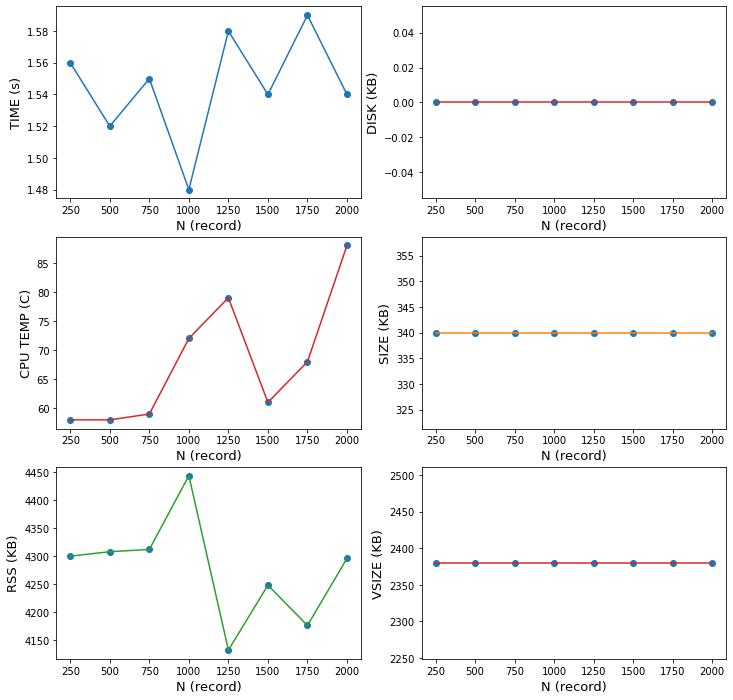

In [ ]:
draw_diagram("sheet/open.csv")

###***4.4. Visualize kết quả search operation***

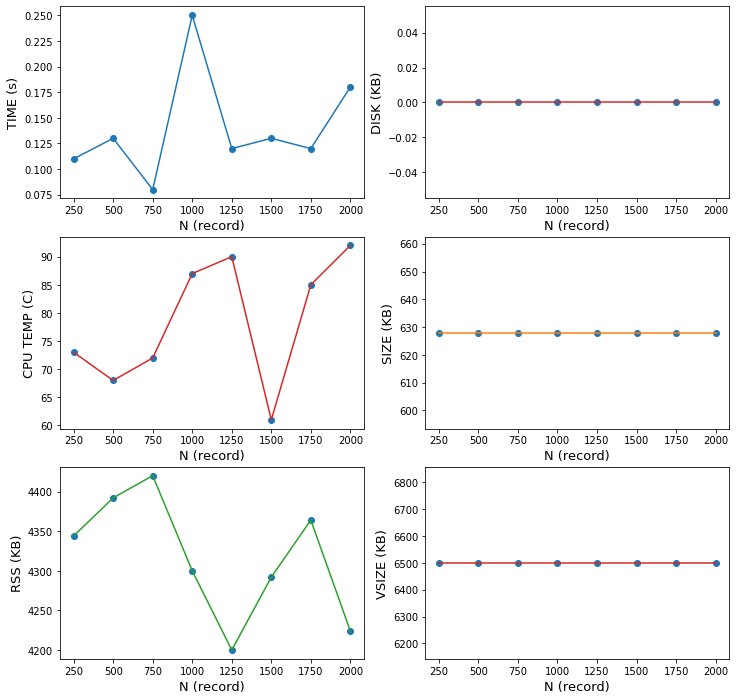

In [ ]:
draw_diagram("sheet/search.csv")

###***4.5. Visualize kết quả insert operation***

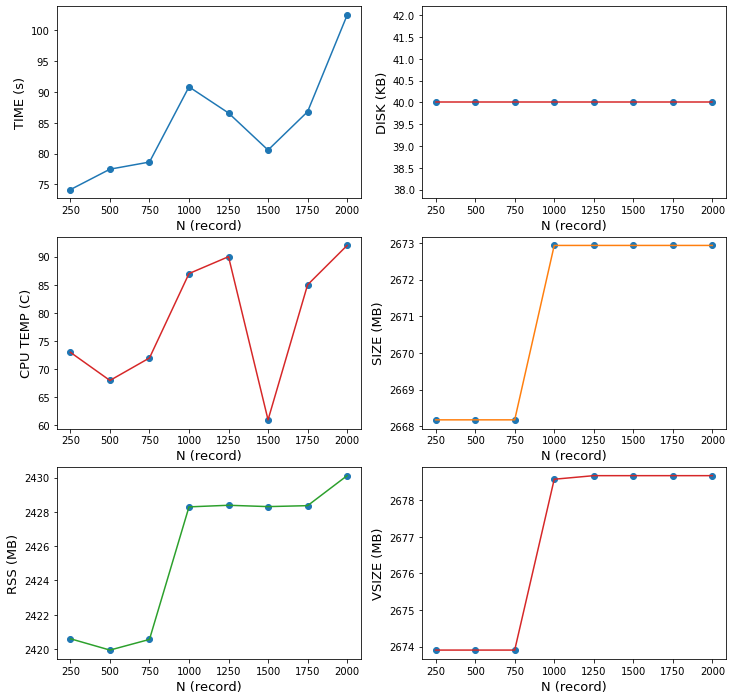

In [ ]:
draw_diagram("sheet/insert.csv", KB_to_MB=True)

###***4.6. Visualize kết quả update operation***

In [ ]:
delete = pd.read_csv("sheet/delete.csv").values
insert = pd.read_csv("sheet/insert.csv").values
update = pd.read_csv("sheet/update.csv").values

delete = delete[:, 1].reshape(-1, 1)
insert = insert[:, 1].reshape(-1, 1)
update = update[:, 1].reshape(-1, 1)
i = 0
while i < 8:
  Tong = delete[i] + insert[i]
  Hieu = delete[i] + insert[i] - update[i]
  print("Tong: ", Tong, " --- ", update[i], " Hieu: ", Hieu)
  i += 1

Tong:  [171.84]  ---  [159.91]  Hieu:  [11.93]
Tong:  [195.09]  ---  [168.24]  Hieu:  [26.85]
Tong:  [207.57]  ---  [164.71]  Hieu:  [42.86]
Tong:  [228.61]  ---  [179.42]  Hieu:  [49.19]
Tong:  [217.07]  ---  [172.05]  Hieu:  [45.02]
Tong:  [220.78]  ---  [165.59]  Hieu:  [55.19]
Tong:  [228.02]  ---  [175.62]  Hieu:  [52.4]
Tong:  [258.59]  ---  [172.62]  Hieu:  [85.97]


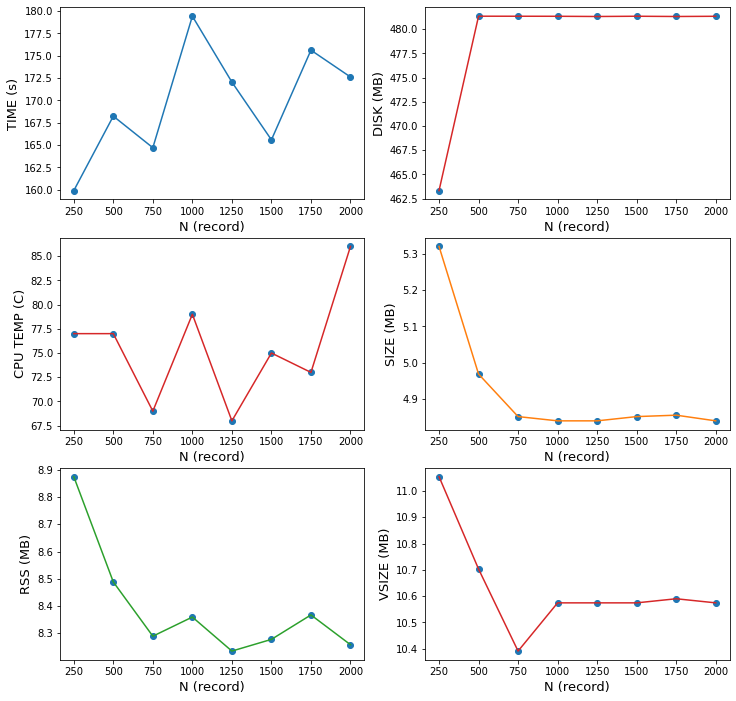

In [ ]:
draw_diagram("sheet/update.csv", KB_to_MB=True)

###***4.7. Visualize kết quả between operation***

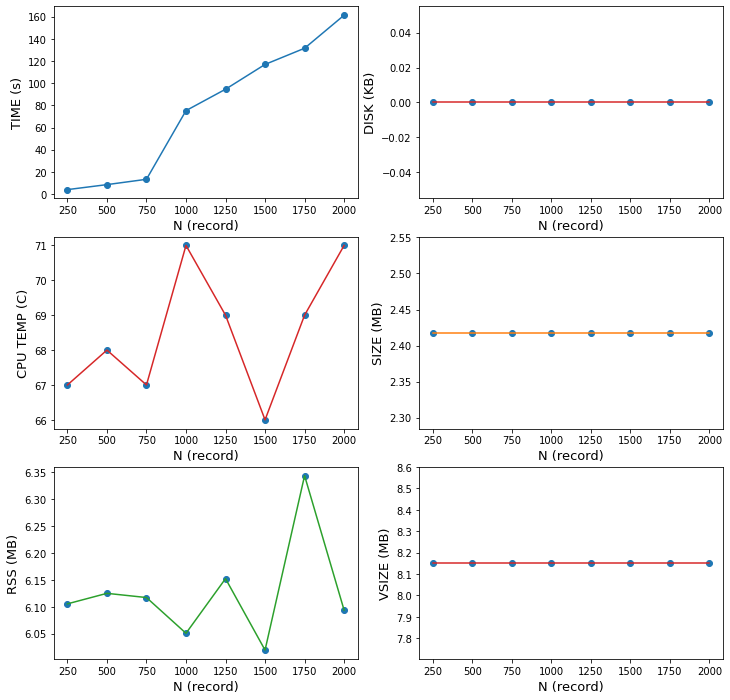

In [ ]:
draw_diagram("sheet/between.csv", KB_to_MB=True)

###***4.8. Visualize kết quả rank operation***

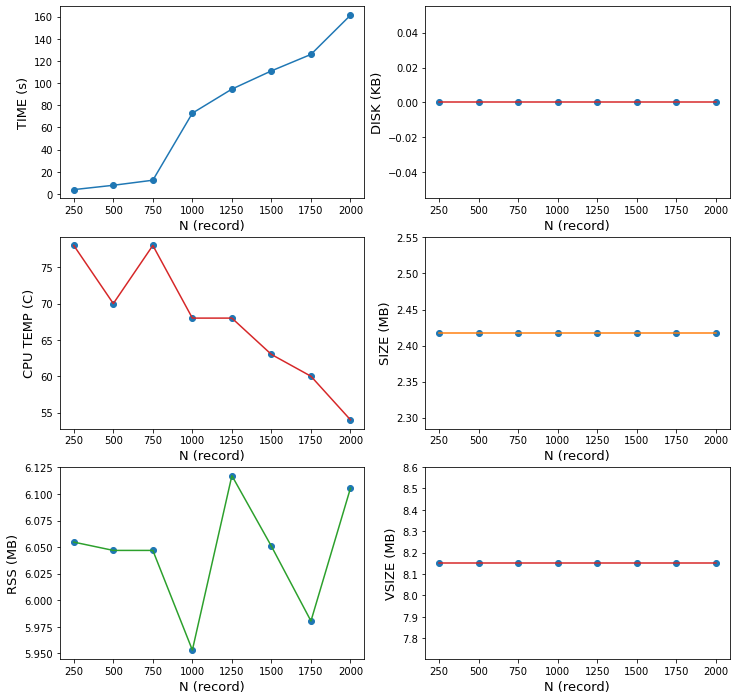

In [ ]:
draw_diagram("sheet/rank.csv", KB_to_MB=True)

###***4.9. Visualize kết quả delete operation***

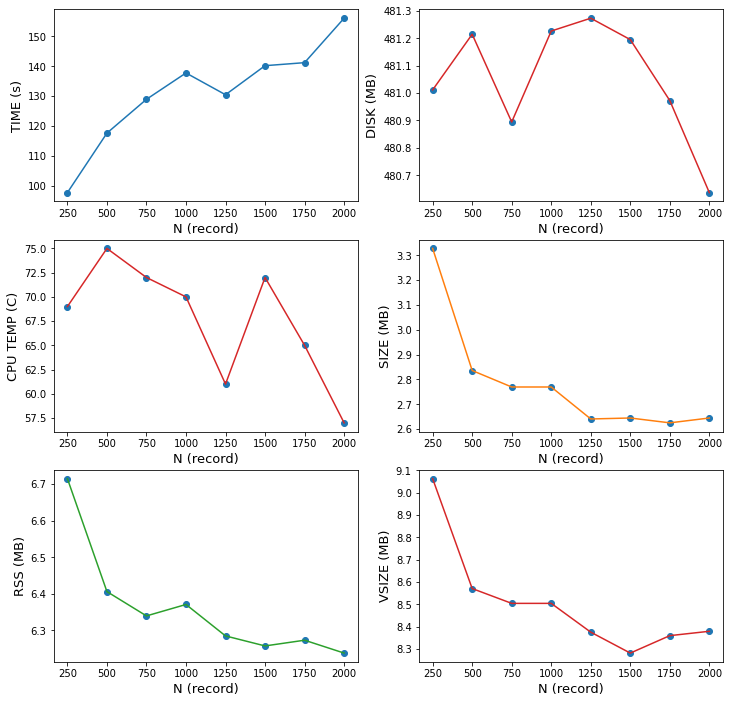

In [ ]:
draw_diagram("sheet/delete.csv", KB_to_MB=True)